In [1]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import csv
from sklearn.preprocessing import LabelEncoder
from scipy.stats import multivariate_normal
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import cv2
import math
import pickle
from sklearn.datasets import load_wine
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from more_itertools import powerset
import wandb
label_encoder = LabelEncoder()
imputer = SimpleImputer(strategy='mean')
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

In [2]:
df = pd.read_csv('./HousingData.csv')
statistics = df.describe()
print(statistics)

             CRIM          ZN       INDUS        CHAS         NOX          RM   
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000  \
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B   
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000  \
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.999513    2.1057

In [3]:
data_standardized = df

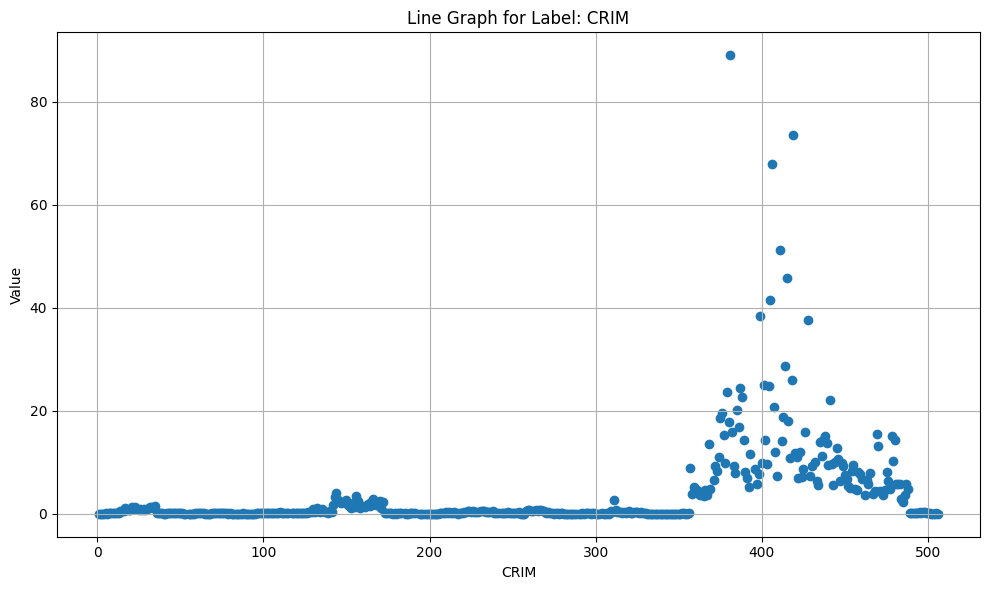

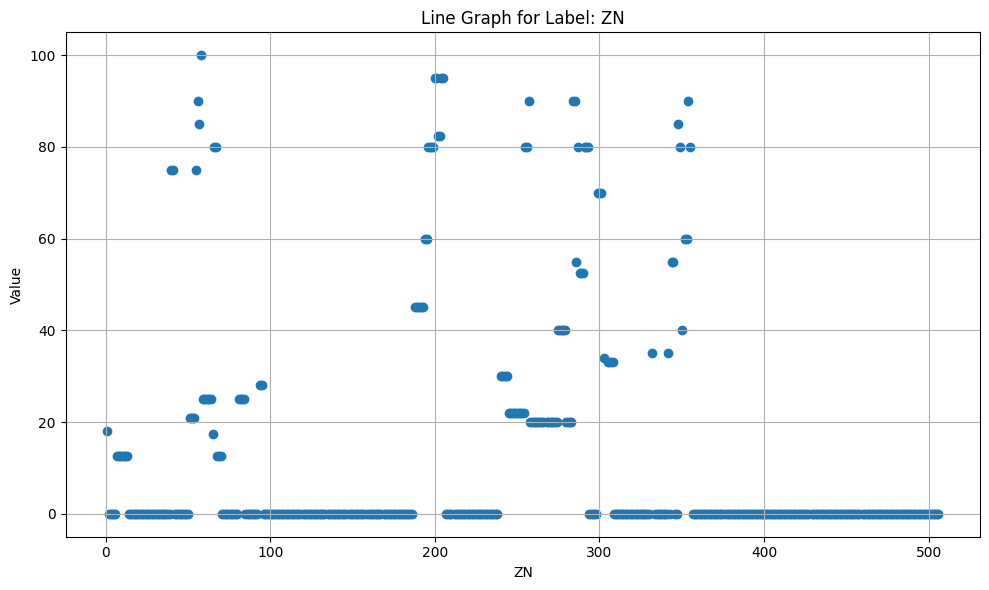

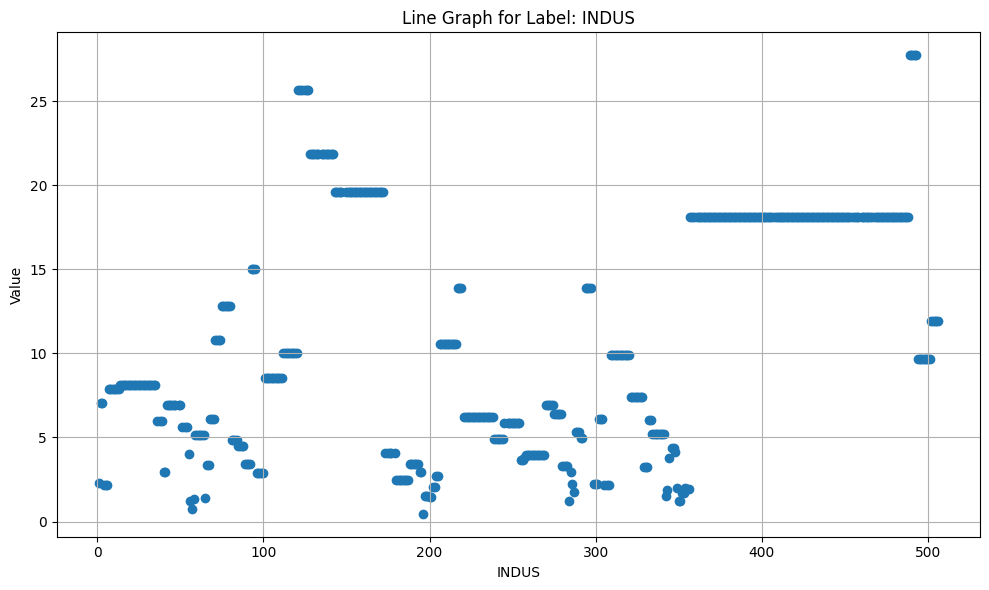

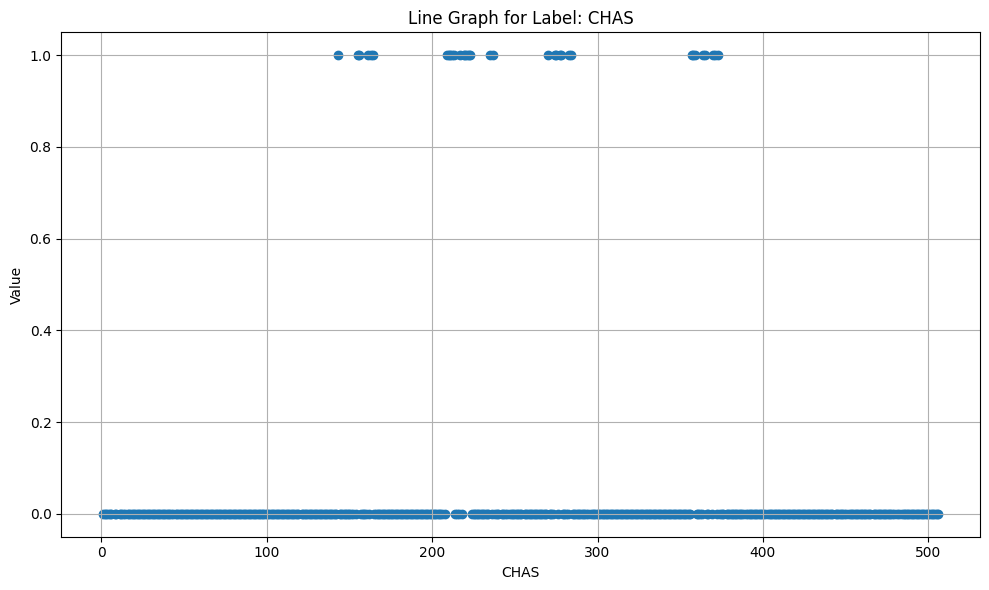

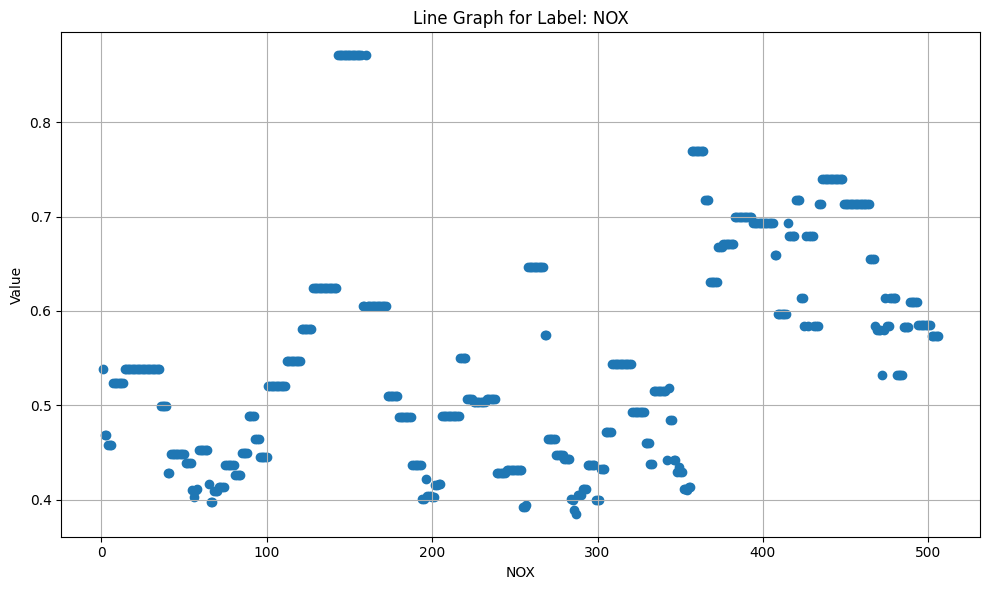

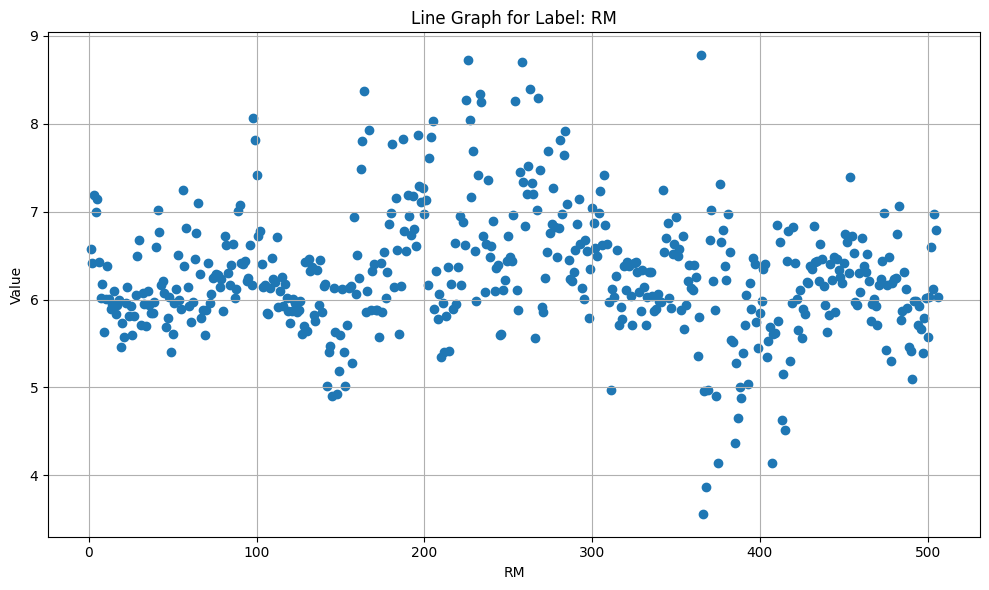

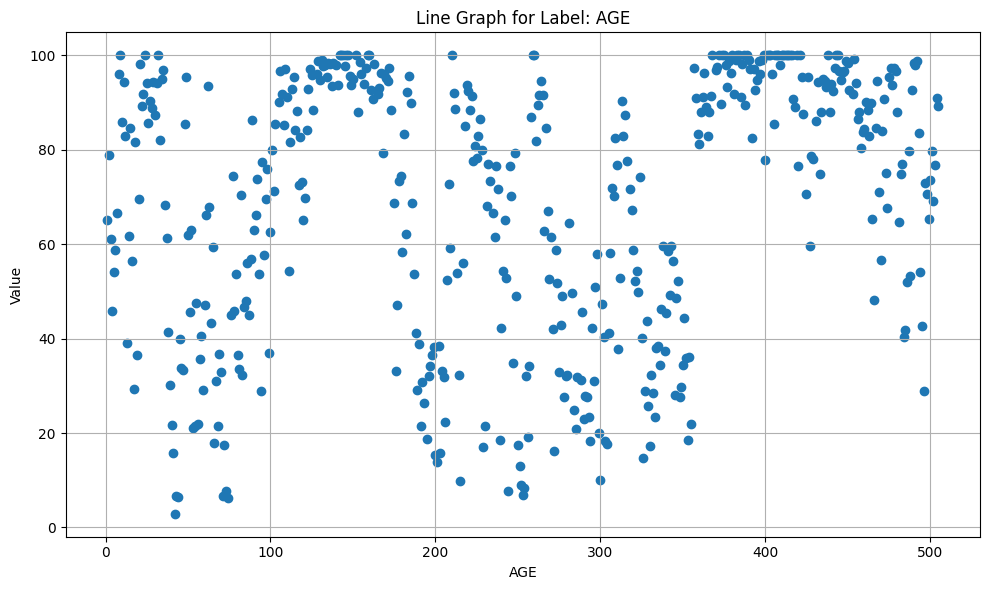

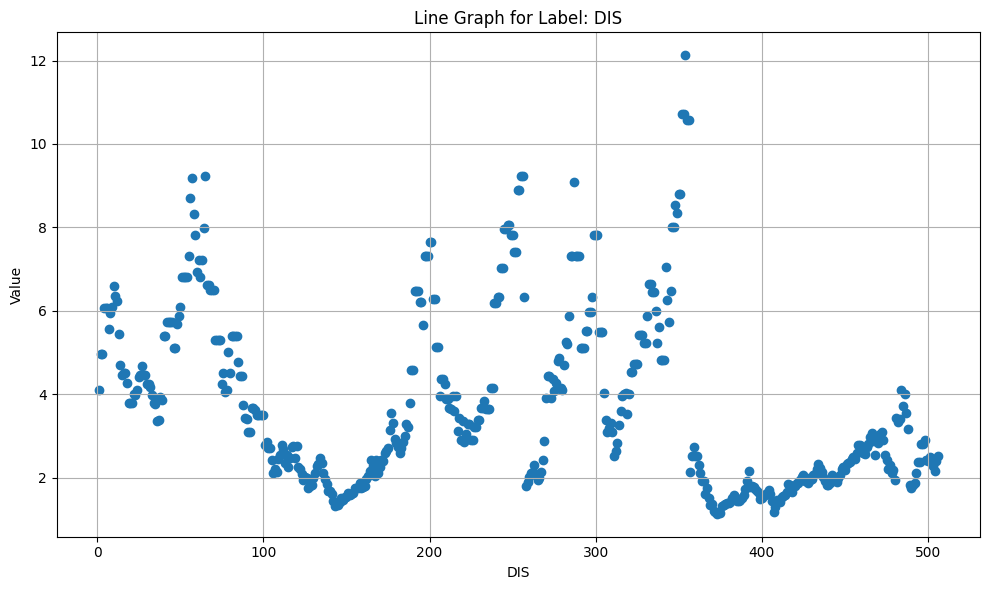

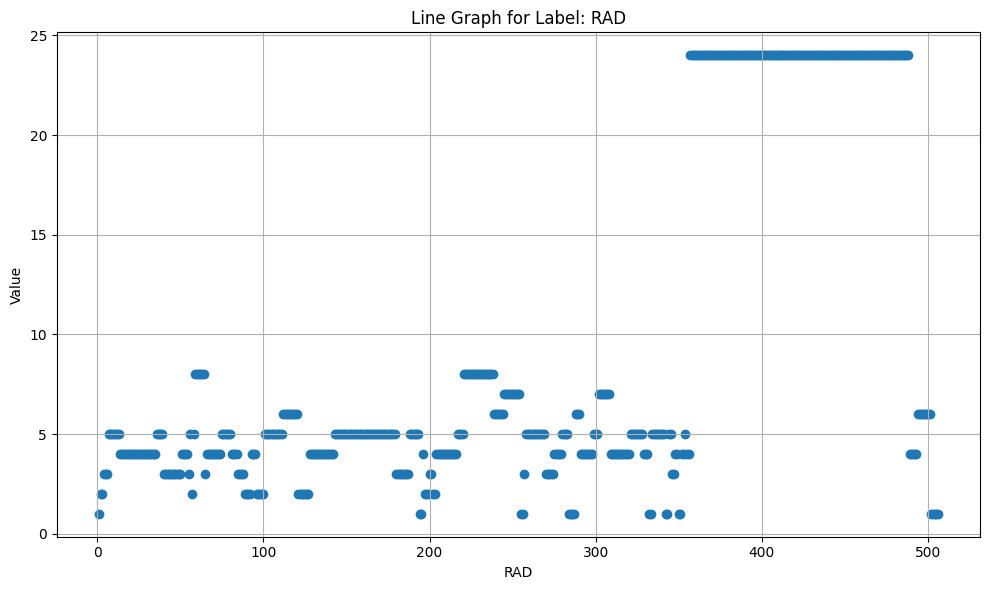

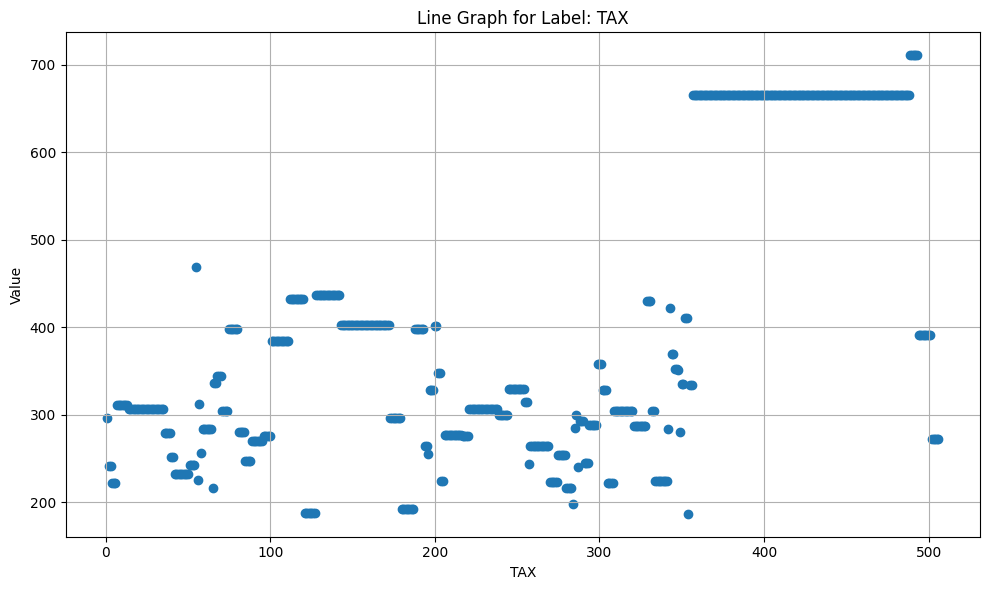

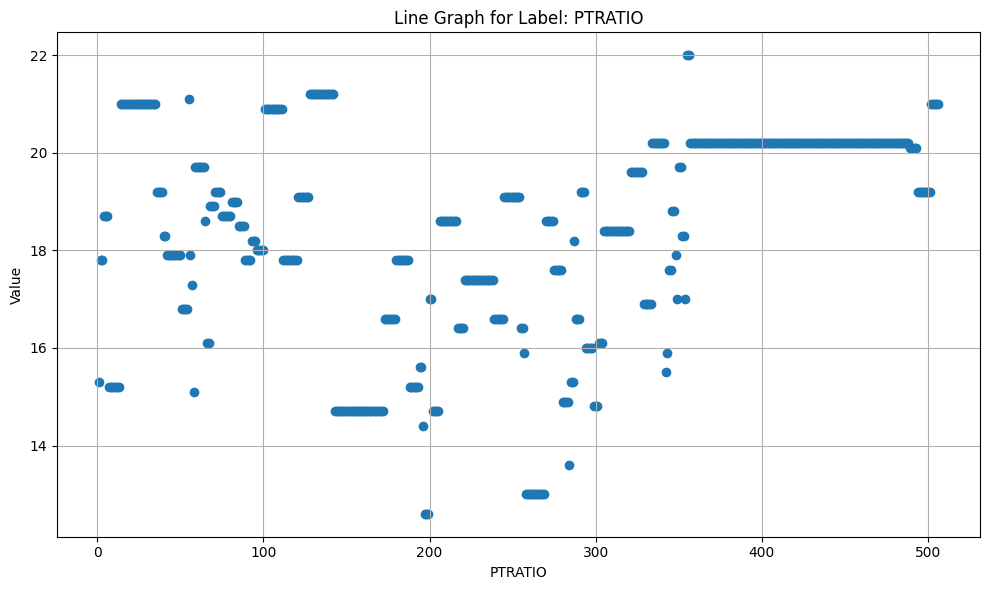

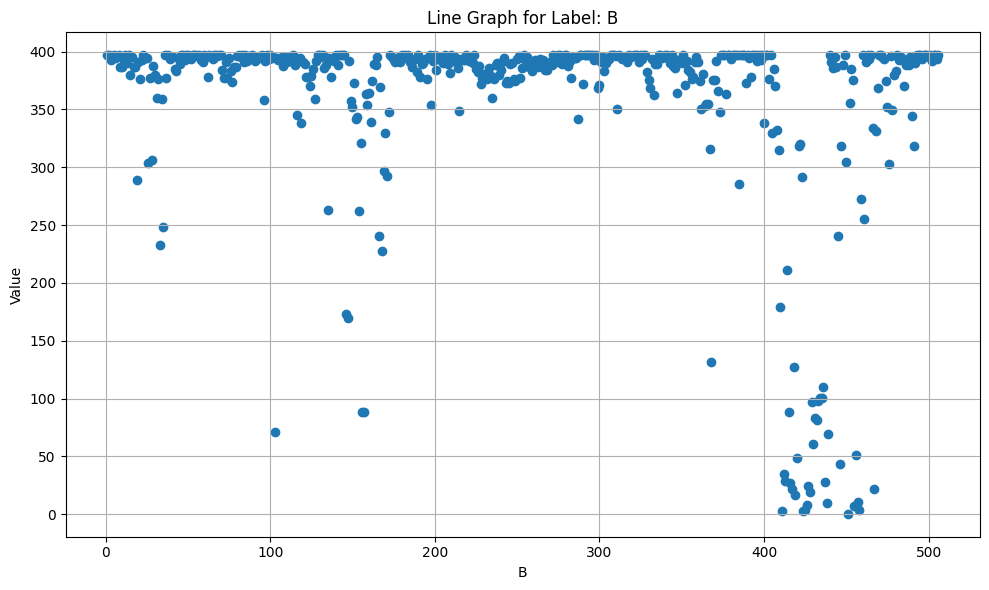

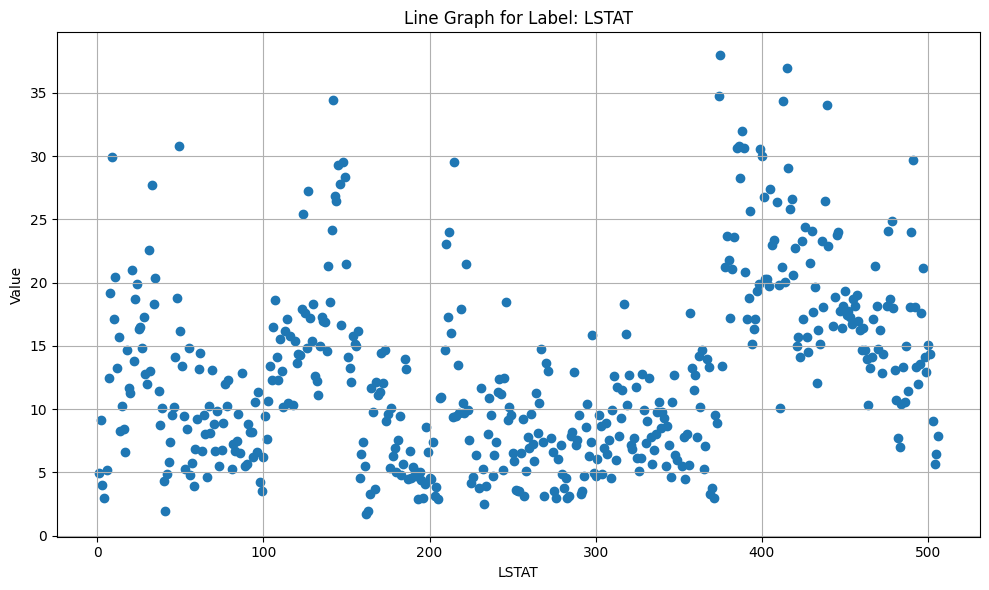

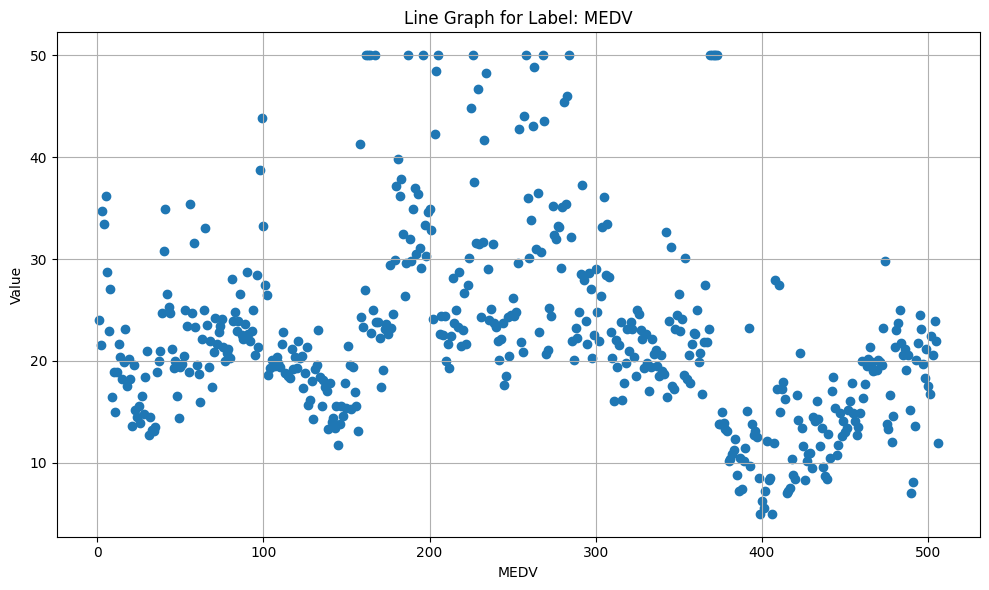

In [4]:
for label_name in data_standardized.columns:
    label_data = data_standardized[label_name]
    arr = list(range(1, len(label_data) + 1))
    plt.figure(figsize=(10, 6))
    plt.scatter(arr, label_data, marker='o', linestyle='-')
    plt.xlabel(label_name)
    plt.ylabel("Value")
    plt.title(f"Line Graph for Label: {label_name}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [5]:
features = data_standardized.columns.difference(["MEDV"])
print(features)

Index(['AGE', 'B', 'CHAS', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'RM', 'TAX', 'ZN'],
      dtype='object')


In [6]:
x_train, x_temp, y_train, y_temp = train_test_split(data_standardized[features], data_standardized["MEDV"], test_size=0.4, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [7]:
x_train.fillna(x_train.mean(), inplace=True) 
x_val.fillna(x_val.mean(), inplace=True) 
x_test.fillna (x_test.mean(), inplace=True)

std_scaler = StandardScaler() 
x_train = std_scaler.fit_transform(x_train)
x_val = std_scaler.transform(x_val)
x_test = std_scaler.transform(x_test)

x_train = pd.DataFrame(x_train)
x_val = pd.DataFrame(x_val)
x_test = pd.DataFrame(x_test)

In [8]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid(x):
    return 1 / (1 + np.exp(-1 * x))

def sigmoid_derivative(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - x**2

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [9]:
def multi_layer_perceptron_regression(data_x, data_y, learning_rate, activation_function, optimizer, number_of_hidden_layers, number_of_neurons_per_layer, number_of_epochs, batch_size):
    number_of_features = len(data_x.columns)
    number_of_data_points = len(data_x)
    number_of_classes = 1
    
    data_y = data_y.reshape(number_of_data_points, 1)

    if optimizer == "stochastic gradient descent":
        batch_size = 1
    if optimizer == "batch":
        batch_size = number_of_data_points

    weights = []
    biases = []
    weights.append(np.random.randn(number_of_features, number_of_neurons_per_layer[0]))
    biases.append(np.zeros((1, number_of_neurons_per_layer[0])))
    for i in range(1, number_of_hidden_layers):
        weights.append(np.random.randn(number_of_neurons_per_layer[i-i], number_of_neurons_per_layer[i]))
        biases.append(np.zeros((1, number_of_neurons_per_layer[i])))
    weights.append(np.random.randn(number_of_neurons_per_layer[number_of_hidden_layers - 1], number_of_classes))
    biases.append(np.zeros((1, number_of_classes)))

    train_loss_per_epoch = []

    for epoch in range(0, number_of_epochs):
        print(epoch)
        indices = np.arange(len(data_x))
        np.random.shuffle(indices)
        total_batches = len(data_x) // batch_size
        batched_indices = np.array_split(indices, total_batches)
        x_batches = [data_x.values[idx] for idx in batched_indices]
        y_batches = [data_y[idx] for idx in batched_indices]
        for h in range(total_batches):
            data_x_batch = x_batches[h]
            data_y_batch = y_batches[h]

            outputs = []
            hidden_output = data_x_batch
            outputs.append(hidden_output)
            for i in range(0, number_of_hidden_layers):
                hidden_input = np.dot(hidden_output, weights[i]) + biases[i]
                if activation_function == "relu":
                    hidden_output = relu(hidden_input)
                elif activation_function == "tanh":
                    hidden_output = tanh(hidden_input)
                elif activation_function == "sigmoid":
                    hidden_output = sigmoid(hidden_input)
                else:
                    return
                outputs.append(hidden_output)
            hidden_input = np.dot(hidden_output, weights[number_of_hidden_layers]) + biases[number_of_hidden_layers]
            hidden_output = hidden_input
            outputs.append(hidden_output)

            errors = []
            errors.append((data_y_batch - outputs[number_of_hidden_layers + 1]) * 2)
            for i in range(1, number_of_hidden_layers + 1):
                if activation_function == "relu":
                    errors.append(errors[i - 1].dot(weights[number_of_hidden_layers - i + 1].T) * relu_derivative(outputs[number_of_hidden_layers + 1 - i]))
                elif activation_function == "tanh":
                    errors.append((errors[i - 1].dot(weights[number_of_hidden_layers - i + 1].T)) * tanh_derivative(outputs[number_of_hidden_layers + 1 - i]))
                elif activation_function == "sigmoid":
                    errors.append(errors[i - 1].dot(weights[number_of_hidden_layers - i + 1].T) * sigmoid_derivative(outputs[number_of_hidden_layers + 1 - i]))
                else:
                    return

            for i in range(0, number_of_hidden_layers + 1):
                weights[number_of_hidden_layers - i] += outputs[number_of_hidden_layers - i].T.dot(errors[i]) * learning_rate / (len(data_x_batch))
                biases[number_of_hidden_layers - i] += np.sum(errors[i], axis=0, keepdims=True) * learning_rate / (len(data_x_batch))

        hidden_output = data_x.values
        for i in range(0, number_of_hidden_layers):
            hidden_input = np.dot(hidden_output, weights[i]) + biases[i]
            if activation_function == "relu":
                hidden_output = relu(hidden_input)
            elif activation_function == "tanh":
                hidden_output = tanh(hidden_input)
            elif activation_function == "sigmoid":
                hidden_output = sigmoid(hidden_input)
            else:
                return
        hidden_input = np.dot(hidden_output, weights[number_of_hidden_layers]) + biases[number_of_hidden_layers]
        hidden_output = hidden_input
        print(np.mean((data_y - hidden_output)**2))
        train_loss_per_epoch.append(np.mean((data_y - hidden_output)**2))


    return weights, biases, train_loss_per_epoch

In [10]:
np.random.seed(42)
number_of_hidden_layers = 2
activation_function = "tanh"
weights, biases, train_loss_per_epoch = multi_layer_perceptron_regression(x_train, y_train.values, 0.0001, activation_function, "mini-batch", number_of_hidden_layers, [6, 6], 1000, 8)

0
615.3643568986317
1
597.13207587296
2
579.692858842827
3
562.6018905659447
4
545.6839724410085
5
528.9840236087881
6
512.5527800196352
7
496.6570927672926
8
481.20490081870383
9
466.09089315352423
10
451.2107751076135
11
436.5007335731209
12
421.81474758962446
13
407.14246908922047
14
392.45557842101175
15
377.68292255048334
16
362.6551905869062
17
347.513919471992
18
332.34682032610635
19
317.4358999192592
20
302.6501086690814
21
288.05396299075477
22
273.9641484964366
23
260.43469928653224
24
247.3897173935482
25
234.89754780097576
26
223.13392840555187
27
212.0249879586317
28
201.5902264889481
29
191.8307208137741
30
182.685785370639
31
174.08562857648909
32
166.05410131974753
33
158.55227071467024
34
151.52300597269024
35
144.9555102389705
36
138.8621889091442
37
133.19927864487568
38
128.01089928003515
39
123.20487792660919
40
118.75923086065244
41
114.61259877633421
42
110.79244106226749
43
107.20049980808366
44
103.83917765843968
45
100.65597957309818
46
97.62043832247838
47
9

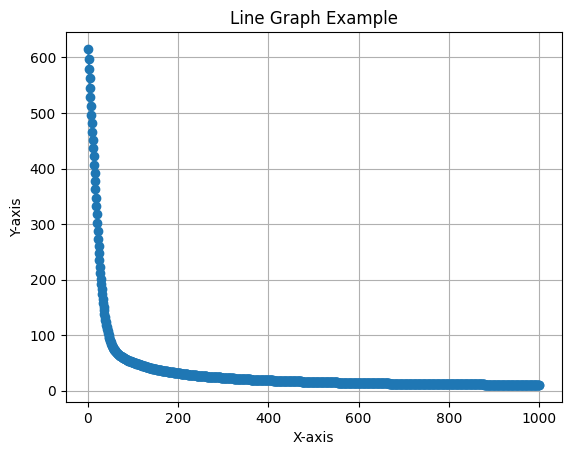

In [11]:
x_values = range(1, len(train_loss_per_epoch) + 1)

plt.plot(x_values, train_loss_per_epoch, marker='o', linestyle='-')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Graph Example')

plt.grid(True)
plt.show()

In [12]:
hidden_output = x_test.values
for i in range(0, number_of_hidden_layers):
    hidden_input = np.dot(hidden_output, weights[i]) + biases[i]
    if activation_function == "relu":
        hidden_output = relu(hidden_input)
    elif activation_function == "tanh":
        hidden_output = tanh(hidden_input)
    elif activation_function == "sigmoid":
        hidden_output = sigmoid(hidden_input)
hidden_input = np.dot(hidden_output, weights[number_of_hidden_layers]) + biases[number_of_hidden_layers]
hidden_output = hidden_input

In [13]:
loss = np.mean((y_test.values[:, np.newaxis] - hidden_output)**2)
print(loss)

23.505531888485457


In [14]:
hidden_output = hidden_output.flatten()

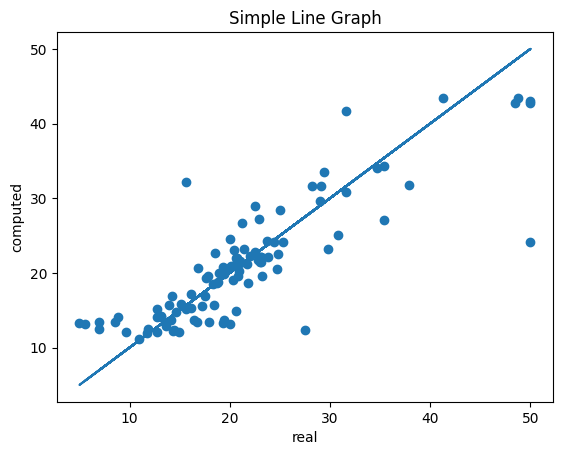

In [15]:
plt.scatter(y_test.values, hidden_output)
plt.plot(y_test.values, y_test.values)
plt.xlabel('real')
plt.ylabel('computed')
plt.title('Simple Line Graph')
plt.show()

In [17]:
wandb.init(project="smai_assignment_3_3", entity="harshitaggarwal4")

config = wandb.config
config.learning_rate = [0.001, 0.0001]
config.batch_size = [32, 64]
config.num_epochs = [200, 1000]
config.activation_functions = ['relu', 'tanh', 'sigmoid']
config.optimizers = ['batch', 'mini-batch', 'stochastic gradient descent']

for lr in config.learning_rate:
    for batch_size in config.batch_size:
        for activation_function in config.activation_functions:
            for optimizer in config.optimizers:
                for number_of_epochs in config.num_epochs:
                    weights, biases, train_loss_per_epoch = multi_layer_perceptron_regression(x_train, y_train.values, lr, activation_function, optimizer, 2, [6, 6], number_of_epochs, 8)
                    for i in range(0, len(train_loss_per_epoch)):
                        wandb.log({
                            "Learning Rate": lr,
                            "Batch Size": batch_size,
                            "Activation_function": activation_function,
                            "Optimizer": optimizer,
                            "Loss": train_loss_per_epoch[i],
                            "Epoch": i
                        })
wandb.finish()

0
462.61660613500555
1
402.54489959697696
2
366.1034440115724
3
340.083003506586
4
319.26308843075225
5
300.50899904225184
6
282.8912802354416
7
266.57927433116976
8
252.15334438384397
9
239.2133921971862
10
226.54461845828268
11
214.35254145142343
12
202.33301935847877
13
190.84670116519686
14
179.89152864544758
15
169.61938278687887
16
160.10910273283054
17
150.8139807986345
18
141.91063695884472
19
133.59351485436255
20
125.89897866932621
21
118.82374538296796
22
112.41591526390128
23
106.59040595652941
24
101.32646061772213
25
96.50679234229936
26
91.98736628175486
27
87.83220790493215
28
84.01703314707899
29
80.52025388003356
30
77.3516267032744
31
74.47932709495174
32
71.82347145491194
33
69.40365886179013
34
67.1700989660025
35
65.08434147562362
36
63.17547165782092
37
61.45897770054965
38
59.8946747666739
39
58.44273490395083
40
57.11012230277275
41
55.865015627335914
42
54.7154468808689
43
53.64442089489102
44
52.64655927540688
45
51.71337189045311
46
50.80784466784305
47
49.9

Batch Size,▁▁▁▁▁▁▁▁▁▁██████████▁▁▁▁▁▁▁▁▁▁██████████
Epoch,▃▂▂█▇▅▄▃▅▄▃▁▂█▆▅▇▆▅▄▂▁▁▇▁▁▇▆▅▃▂▂▃▂▂█▇▅▄▇
Learning Rate,████████████████████▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Loss,▁▁▁▁▁▁▁▂▁▁▁▁▁▁▂▁▁▂▁▁▃▁▁▁▃▁▁▄▁▁▃▁▁█▁▁▁▅▁▁
Activation_function,sigmoid
Batch Size,64
Epoch,999
Learning Rate,0.0001
Loss,4.02297
Optimizer,stochastic gradient ...


In [21]:
weights, biases, train_loss_per_epoch = multi_layer_perceptron_regression(x_train, y_train.values, 0.0001, "sigmoid", "stochastic gradient descent", 2, [6, 6], 1000, 8)
hidden_output = x_test.values
for i in range(0, number_of_hidden_layers):
    hidden_input = np.dot(hidden_output, weights[i]) + biases[i]
    if activation_function == "relu":
        hidden_output = relu(hidden_input)
    elif activation_function == "tanh":
        hidden_output = tanh(hidden_input)
    elif activation_function == "sigmoid":
        hidden_output = sigmoid(hidden_input)
hidden_input = np.dot(hidden_output, weights[number_of_hidden_layers]) + biases[number_of_hidden_layers]
hidden_output = hidden_input
loss = np.mean((y_test.values[:, np.newaxis] - hidden_output)**2)
print("MSE:", loss)
print("RMSE:", np.sqrt(loss))

mean_true = np.mean(y_test)
sst = np.sum((y_test - mean_true) ** 2)
sse = np.sum((y_test - hidden_output.reshape(-1)) ** 2)
r2 = 1 - (sse / sst)
print("R-Squared:", r2)

0
460.56026056218917
1
314.4307215184051
2
216.57253182476322
3
156.87349622592677
4
123.7393454163938
5
105.17768066208562
6
94.86049593580766
7
88.65925028511295
8
84.58410105562287
9
81.46620756085888
10
78.849216933738
11
76.52987468103444
12
74.42905564611611
13
72.50193712000419
14
70.71404192571393
15
69.0084530063156
16
67.35742826504217
17
65.72232230637638
18
64.07916711396238
19
62.40137408557994
20
60.67985082005314
21
58.92039070679839
22
57.14628363258185
23
55.392872291376776
24
53.717765893687094
25
52.1276099610366
26
50.65718161752128
27
49.28236081643785
28
47.99454166098991
29
46.7790148513765
30
45.632014514719444
31
44.526969750522234
32
43.478707291147636
33
42.47003615720232
34
41.51705783257809
35
40.620775728585116
36
39.7768233742329
37
38.99192250931237
38
38.25230454456952
39
37.55765746493087
40
36.90582343203024
41
36.29157317675927
42
35.71678562541054
43
35.166125689732446
44
34.6466658284027
45
34.15614241228026
46
33.67584120976747
47
33.2168244439180